# Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
import time

df1 = pd.read_csv('/content/drive/MyDrive/HK6_2022-2023/IS252.N22.HTCL - Khai thác dữ liệu/KTDL_Project/Data/Credit_Score_Classification.csv')


In [ ]:
df1

,Unnamed: 0,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0,1,23,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,26.822620,265.0,1,49.574949,80.415295,2,312.494089,0
1,1,2,23,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,31.944960,265.0,1,49.574949,118.280222,3,284.629162,0
2,2,3,23,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,28.609352,267.0,1,49.574949,81.699521,4,331.209863,0
3,3,4,23,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,31.377862,268.0,1,49.574949,199.458074,5,223.451310,0
4,4,5,23,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,24.797347,269.0,1,49.574949,41.420153,1,341.489231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,4,25,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,1,502.38,34.663572,378.0,1,35.104023,60.971333,0,393.788917,1
99996,99996,5,25,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,1,502.38,40.565631,379.0,1,35.104023,54.185950,1,393.788917,1
99997,99997,6,25,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,1,502.38,41.255522,380.0,1,35.104023,24.028477,0,393.788917,1
99998,99998,7,25,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,1,502.38,33.638208,381.0,1,35.104023,251.672582,3,393.788917,2


In [ ]:
df1 = df1.drop('Unnamed: 0', axis = 1)

In [ ]:
features = df1.drop('Credit_Score', axis=1)
labels = df1['Credit_Score']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)


# Algorithms

## Decision Tree


### ID3

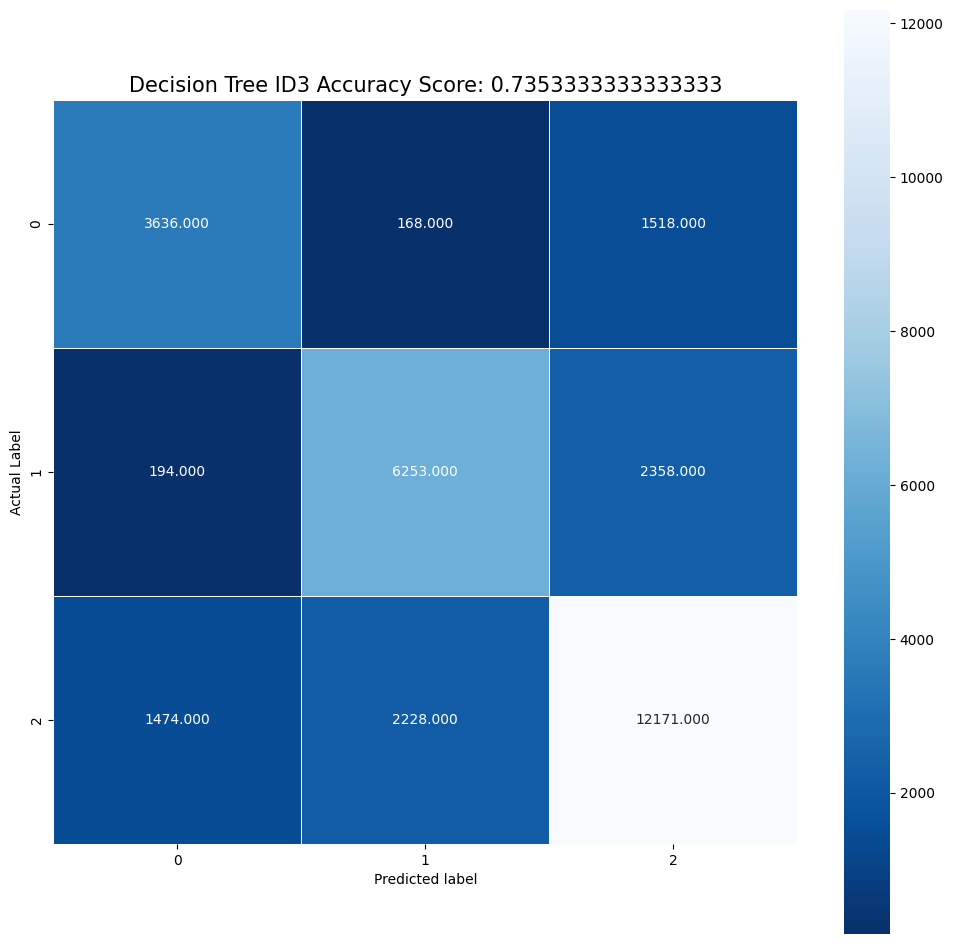

Time Process: 1.7709407659999954
Training Accuracy: 1.0
Test Accuracy: 0.7353333333333333
Report:                precision    recall  f1-score   support

           0       0.69      0.68      0.68      5322
           1       0.72      0.71      0.72      8805
           2       0.76      0.77      0.76     15873

    accuracy                           0.74     30000
   macro avg       0.72      0.72      0.72     30000
weighted avg       0.74      0.74      0.74     30000



In [ ]:
start_ID3 = time.process_time()
clf_entropy = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
#Train Decision Tree Classifer
clf_entropy.fit(X_train, y_train)
end_ID3 = time.process_time()
time_id3 = []
time_id3.append(end_ID3 - start_ID3)

#Predict the response for test dataset
train_pred_entropy = clf_entropy.predict(X_train)
test_pred_entropy = clf_entropy.predict(X_test)

#Model Accuracy, how often is the classifre correct?
train_accuracy_entropy = metrics.accuracy_score(y_train, train_pred_entropy)
test_accuracy_entropy = metrics.accuracy_score(y_test, test_pred_entropy)
#Confusion Matrix
cm_id3 = metrics.confusion_matrix(y_test, test_pred_entropy)

#Heatmap
plt.figure(figsize=(12,12))
sns.heatmap(cm_id3, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')
title = 'Decision Tree ID3 Accuracy Score: {0}'.format(test_accuracy_entropy)
plt.title(title, size=15)
plt.show()

print("Time Process:", end_ID3 - start_ID3)
print("Training Accuracy:", train_accuracy_entropy)
print("Test Accuracy:", test_accuracy_entropy)
print("Report: ", metrics.classification_report(y_test, test_pred_entropy))

### CART

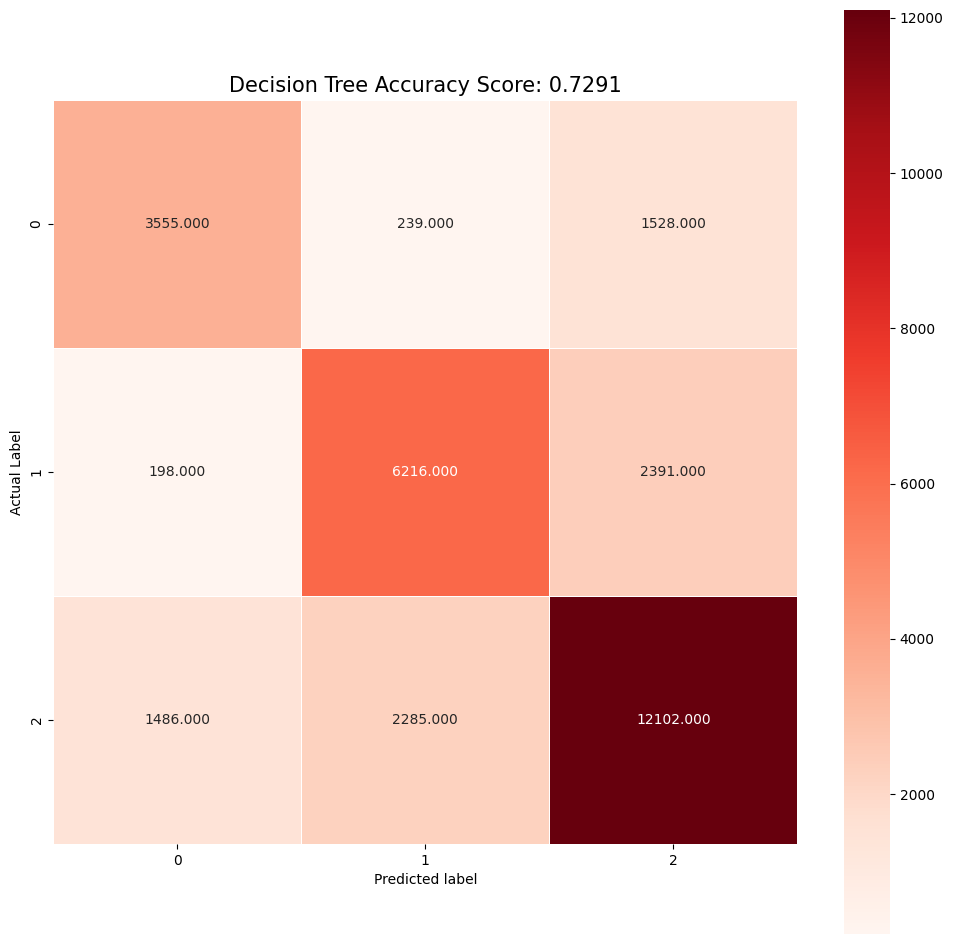

Time Process: 1.7709407659999954
Accuracy on training set: 1.0
Accuracy on test set: 0.7291
Report:               precision    recall  f1-score   support

           0       0.68      0.67      0.67      5322
           1       0.71      0.71      0.71      8805
           2       0.76      0.76      0.76     15873

    accuracy                           0.73     30000
   macro avg       0.72      0.71      0.71     30000
weighted avg       0.73      0.73      0.73     30000



In [ ]:
start_CART = time.time()
clf_gini = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
#Train Decision Tree Classifer
clf_gini.fit(X_train, y_train)
end_CART = time.time()
time_cart = []
time_cart.append(end_CART - start_CART)

#Predict the response for test dataset
train_pred_gini = clf_gini.predict(X_train)
test_pred_gini = clf_gini.predict(X_test)

#Model Accuracy, how often is the classifre correct?
train_accuracy_gini = metrics.accuracy_score(y_train, train_pred_gini)
test_accuracy_gini = metrics.accuracy_score(y_test, test_pred_gini)
#Confusion Metric
cm_gini = metrics.confusion_matrix(y_test, test_pred_gini)

#Heatmap
plt.figure(figsize=(12,12))
sns.heatmap(cm_gini, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Reds')
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')
title = 'Decision Tree Accuracy Score: {0}'.format(test_accuracy_gini)
plt.title(title, size=15)
plt.show()
print("Time Process:", end_ID3 - start_ID3)
print("Accuracy on training set:", train_accuracy_gini)
print("Accuracy on test set:", test_accuracy_gini)
print("Report:", metrics.classification_report(y_test, test_pred_gini))

## Bayes

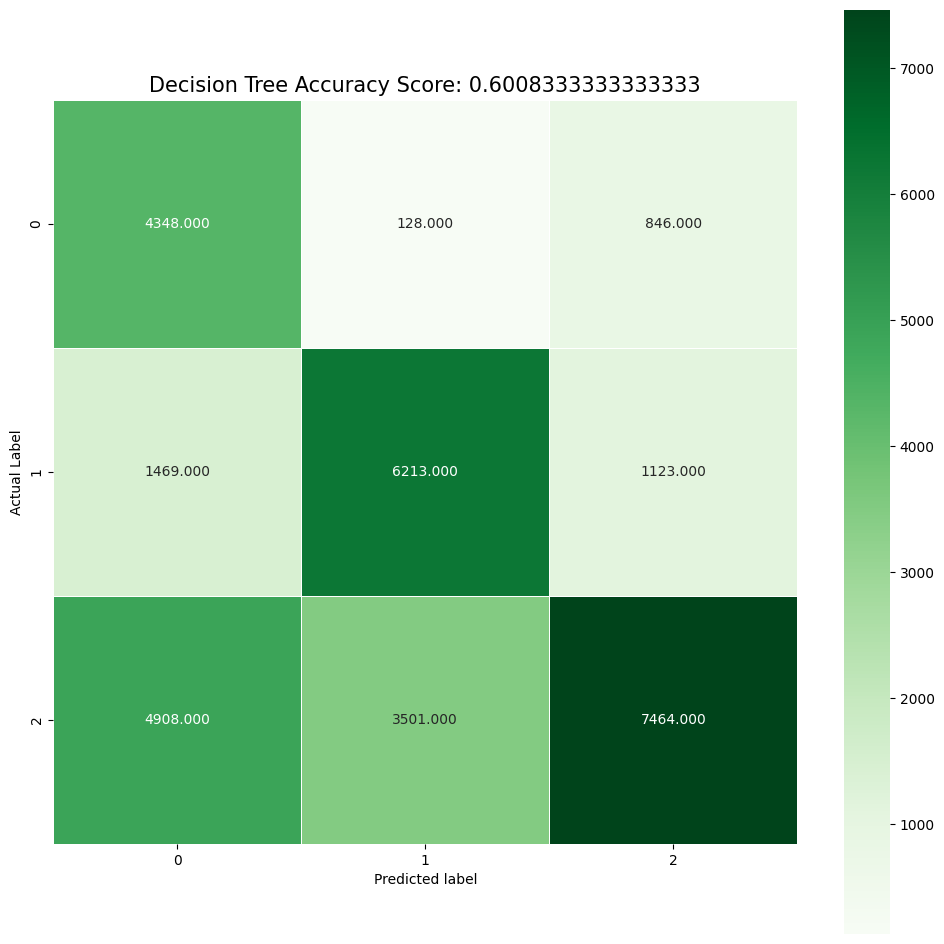

Time Process: 0.030478715896606445
Accuracy on training set: 0.6053285714285714
Accuracy on test set: 0.6008333333333333
Report:               precision    recall  f1-score   support

           0       0.41      0.82      0.54      5322
           1       0.63      0.71      0.67      8805
           2       0.79      0.47      0.59     15873

    accuracy                           0.60     30000
   macro avg       0.61      0.66      0.60     30000
weighted avg       0.68      0.60      0.60     30000



In [ ]:
start_NB = time.time()
gnb = GaussianNB()
#Train Decision Tree Classifer
gnb.fit(X_train, y_train)
end_NB = time.time()
time_nb = []
time_nb.append(end_NB - start_NB)

#Predict the response for test dataset
train_pred_nb = gnb.predict(X_train)
test_pred_nb = gnb.predict(X_test)

#Model Accuracy, how often is the classifre correct?
train_accuracy_nb = metrics.accuracy_score(y_train, train_pred_nb)
test_accuracy_nb = metrics.accuracy_score(y_test, test_pred_nb)
#Confusion metric
cm_nb = metrics.confusion_matrix(y_test, test_pred_nb)

#Heatmap
plt.figure(figsize=(12,12))
sns.heatmap(cm_nb, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Greens')
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')
title = 'Decision Tree Accuracy Score: {0}'.format(test_accuracy_nb)
plt.title(title, size=15)
plt.show()
#Model Accuracy, how often is the classifre correct?
print("Time Process:", end_NB - start_NB)
print("Accuracy on training set:", train_accuracy_nb)
print("Accuracy on test set:", test_accuracy_nb)
print("Report:", metrics.classification_report(y_test, test_pred_nb))


## KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


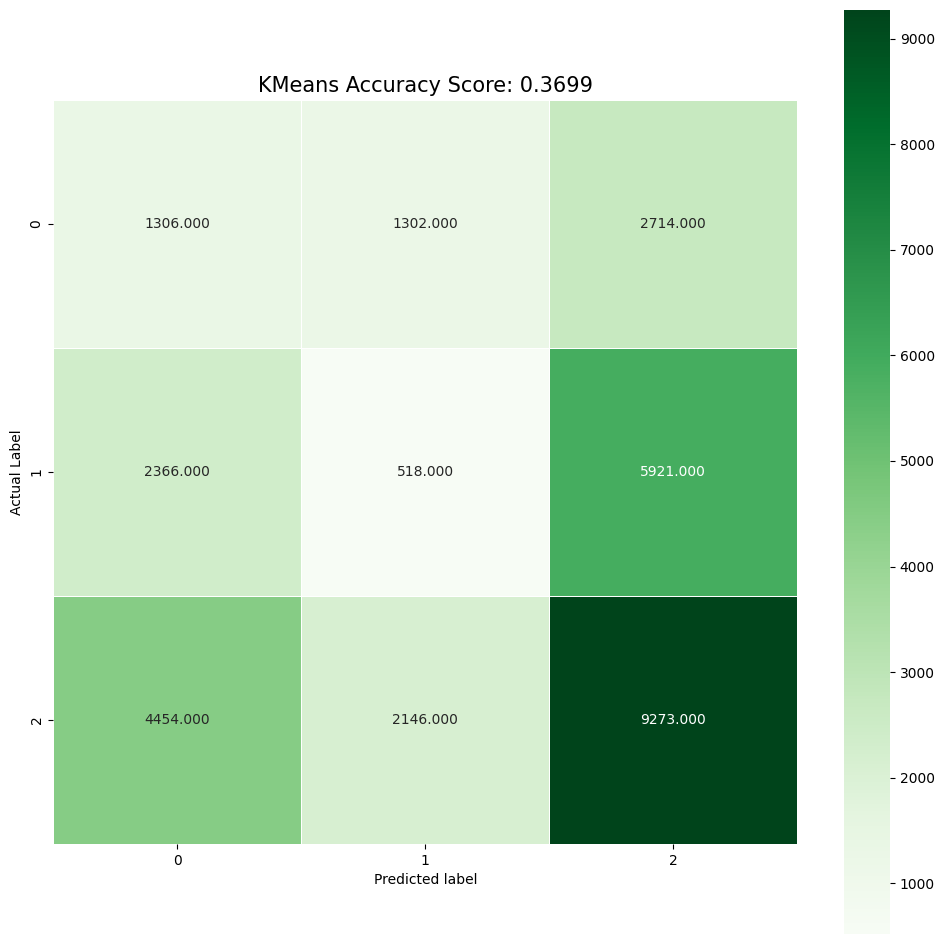

Time Process: 1.345027208328247
Accuracy on training set: 0.3719857142857143
Accuracy on test set: 0.3699
Report:               precision    recall  f1-score   support

           0       0.16      0.25      0.19      5322
           1       0.13      0.06      0.08      8805
           2       0.52      0.58      0.55     15873

    accuracy                           0.37     30000
   macro avg       0.27      0.30      0.27     30000
weighted avg       0.34      0.37      0.35     30000



In [ ]:
# Initialize the KMeans model with the desired number of clusters
kmeans = KMeans(n_clusters=3)

# Train the model on the training data
start_KMeans = time.time()
kmeans.fit(X_train)
end_KMeans = time.time()
train_time_kmeans = start_KMeans - end_KMeans
# Predict labels for the training and test data
train_pred_kmeans = kmeans.predict(X_train)
test_pred_kmeans = kmeans.predict(X_test)

# Evaluate the model's performance
train_accuracy_kmeans = metrics.accuracy_score(y_train, train_pred_kmeans)
test_accuracy_kmeans = metrics.accuracy_score(y_test, test_pred_kmeans)
cm_kmeans = metrics.confusion_matrix(y_test, test_pred_kmeans)

# Plot the confusion matrix
plt.figure(figsize=(12, 12))
sns.heatmap(cm_kmeans, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Greens')
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')
title = 'KMeans Accuracy Score: {0}'.format(test_accuracy_kmeans)
plt.title(title, size=15)
plt.show()

# Print performance metrics of the model
print("Time Process:", end_KMeans - start_KMeans)
print("Accuracy on training set:", train_accuracy_kmeans)
print("Accuracy on test set:", test_accuracy_kmeans)
print("Report:", metrics.classification_report(y_test, test_pred_kmeans))


##Neural Network

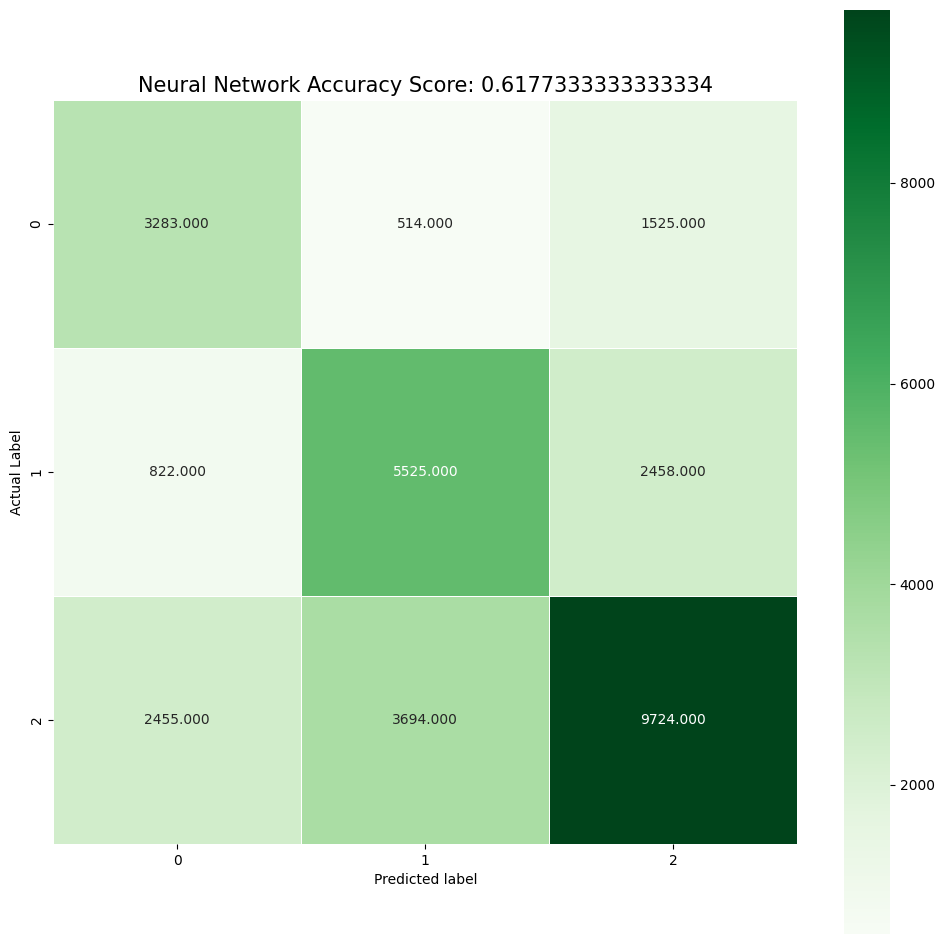

Time Process: 14.957416534423828
Accuracy on training set: 0.6226285714285714
Accuracy on test set: 0.6177333333333334
Report:               precision    recall  f1-score   support

           0       0.50      0.62      0.55      5322
           1       0.57      0.63      0.60      8805
           2       0.71      0.61      0.66     15873

    accuracy                           0.62     30000
   macro avg       0.59      0.62      0.60     30000
weighted avg       0.63      0.62      0.62     30000



In [ ]:
# Initialize the MLPClassifier model with desired parameters
mlp = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=100, random_state=42)

# Train the model on the training data
start_NN = time.time()
mlp.fit(X_train, y_train)
end_NN = time.time()
train_time_nn = start_NN - end_NN

# Predict labels for the training and test data
train_pred_nn = mlp.predict(X_train)
test_pred_nn = mlp.predict(X_test)

# Evaluate the model's performance
train_accuracy_nn = metrics.accuracy_score(y_train, train_pred_nn)
test_accuracy_nn = metrics.accuracy_score(y_test, test_pred_nn)
cm_nn = metrics.confusion_matrix(y_test, test_pred_nn)

# Plot the confusion matrix
plt.figure(figsize=(12, 12))
sns.heatmap(cm_nn, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Greens')
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')
title = 'Neural Network Accuracy Score: {0}'.format(test_accuracy_nn)
plt.title(title, size=15)
plt.show()

# Print performance metrics of the model
print("Time Process:", end_NN - start_NN)
print("Accuracy on training set:", train_accuracy_nn)
print("Accuracy on test set:", test_accuracy_nn)
print("Report:", metrics.classification_report(y_test, test_pred_nn))


## KNN

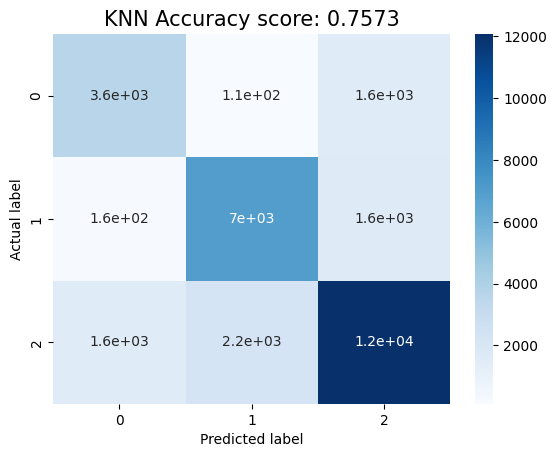

Accuracy_knn: 0.7573
Training Time: 0.025121212005615234
Training Accuracy: 0.8402714285714286
Test Accuracy: 0.7573
Report:                precision    recall  f1-score   support

           0       0.68      0.69      0.68      5322
           1       0.75      0.79      0.77      8805
           2       0.79      0.76      0.78     15873

    accuracy                           0.76     30000
   macro avg       0.74      0.75      0.74     30000
weighted avg       0.76      0.76      0.76     30000



In [ ]:
knn = KNeighborsClassifier()
start_time_knn = time.time()
knn.fit(X_train, y_train)
train_time_knn = time.time() - start_time_knn

y_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred)
train_accuracy_knn = accuracy_score(y_train, y_train_pred)
test_accuracy_knn = accuracy_score(y_test, y_test_pred)

cm_knn = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_knn, annot=True, cmap="Blues")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
title = 'KNN Accuracy score: {0}'.format(accuracy_knn)
plt.title(title, size=15)
plt.show()

print("Accuracy_knn:", accuracy_knn)
print("Training Time:", train_time_knn)
print("Training Accuracy:", train_accuracy_knn)
print("Test Accuracy:", test_accuracy_knn)
print("Report: ", classification_report(y_test, y_pred))


## SVM

Accuracy_svm: 0.5327


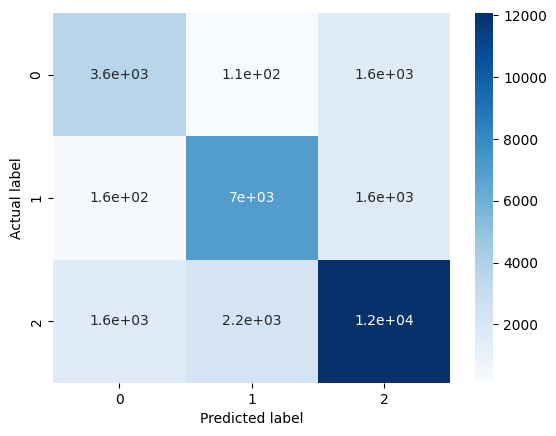

Training Time: 378.0811755657196
Training Accuracy: 0.8402714285714286
Test Accuracy: 0.7573
Report:                precision    recall  f1-score   support

           0       0.46      0.02      0.04      5322
           1       0.50      0.24      0.32      8805
           2       0.54      0.87      0.66     15873

    accuracy                           0.53     30000
   macro avg       0.50      0.38      0.34     30000
weighted avg       0.51      0.53      0.45     30000



In [ ]:
svm = SVC()
start_time_svm = time.time()
svm.fit(X_train, y_train)
train_time_svm = time.time() - start_time_svm
y_pred = svm.predict(X_test)
# Accuracy_score
accuracy_svm = accuracy_score(y_test, y_pred)
print("Accuracy_svm:", accuracy_svm)
#Model Accuracy
train_accuracy_svm = accuracy_score(y_train, y_train_pred)
test_accuracy_svm = accuracy_score(y_test, y_test_pred)
# Confusion matrix
cm_svm = metrics.confusion_matrix(y_test, y_test_pred)

# Heatmap
sns.heatmap(cm_svm, annot=True, cmap="Blues")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
title = 'SVM Accuracy score: {0}'.format(accuracy_svm)
plt.show()
print("Training Time:", train_time_svm)
print("Training Accuracy:", train_accuracy_svm)
print("Test Accuracy:", test_accuracy_svm)
print("Report: ",classification_report(y_test, y_pred))


## Random Forest

Accuracy_rf: 0.8238


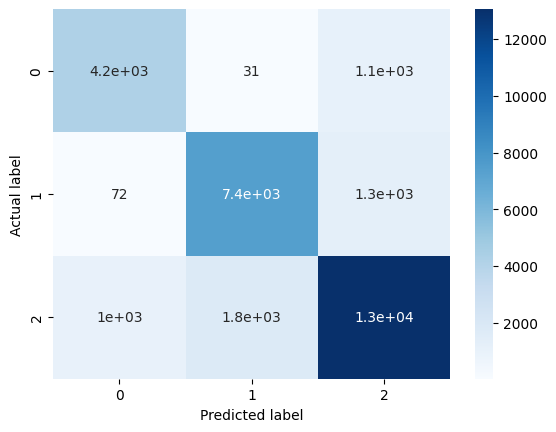

Training Time: 21.19172716140747
Training Accuracy: 1.0
Test Accuracy: 0.8238
Report:                precision    recall  f1-score   support

           0       0.79      0.79      0.79      5322
           1       0.80      0.85      0.82      8805
           2       0.85      0.82      0.83     15873

    accuracy                           0.82     30000
   macro avg       0.81      0.82      0.82     30000
weighted avg       0.82      0.82      0.82     30000



In [ ]:
rf = RandomForestClassifier()
start_time_rf = time.time()
# Train Random Forest classifer
rf.fit(X_train, y_train)
train_time_rf = time.time() - start_time_rf

#Predict the response for dataset
y_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Accuracy_score
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy_rf:", accuracy_rf)
#Model Accuracy
train_accuracy_rf = accuracy_score(y_train, y_train_pred)
test_accuracy_rf = accuracy_score(y_test, y_test_pred)
# Confusion matrix
cm_rf = metrics.confusion_matrix(y_test, y_test_pred)

# Heatmap
sns.heatmap(cm_rf, annot=True, cmap="Blues")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
title = 'Random Forest Accuracy score: {0}'.format(accuracy_rf)
plt.show()
print("Training Time:", train_time_rf)
print("Training Accuracy:", train_accuracy_rf)
print("Test Accuracy:", test_accuracy_rf)
print("Report: ",classification_report(y_test, y_pred))

# Comparison

## Times


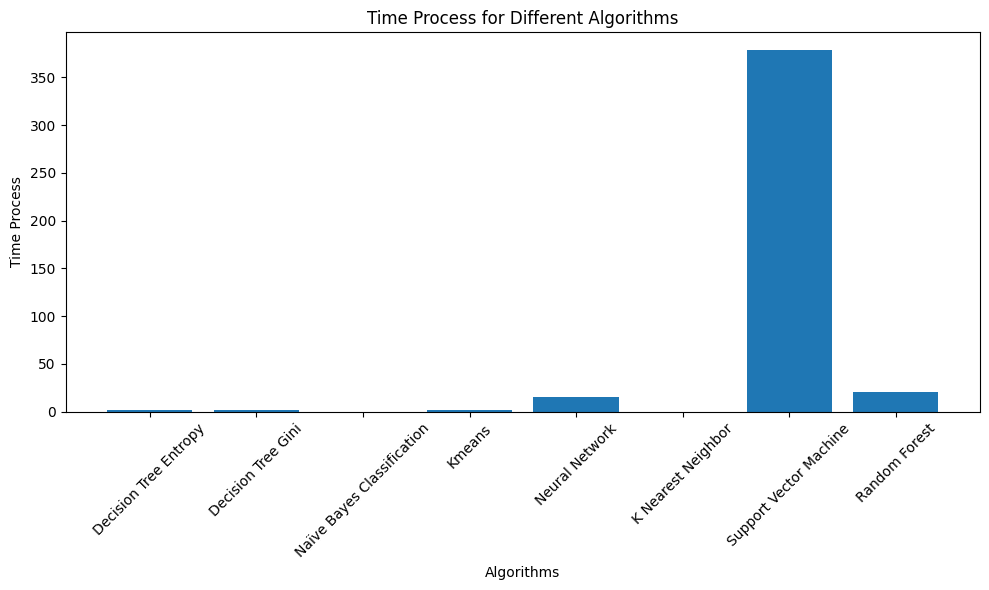

In [ ]:
import matplotlib.pyplot as plt

algorithms = ['Decision Tree Entropy', 'Decision Tree Gini', 'Naïve Bayes Classification', 'Kmeans', 'Neural Network', 'K Nearest Neighbor', 'Support Vector Machine', 'Random Forest']
time_process = [1.7709407659999954, 1.7709407659999954, 0.030478715896606445, 1.345027208328247, 14.957416534423828, 0.025121212005615234, 378.0811755657196, 21.19172716140747]

plt.figure(figsize=(10, 6))
plt.bar(algorithms, time_process)
plt.xlabel('Algorithms')
plt.ylabel('Time Process')
plt.title('Time Process for Different Algorithms')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Accuracy


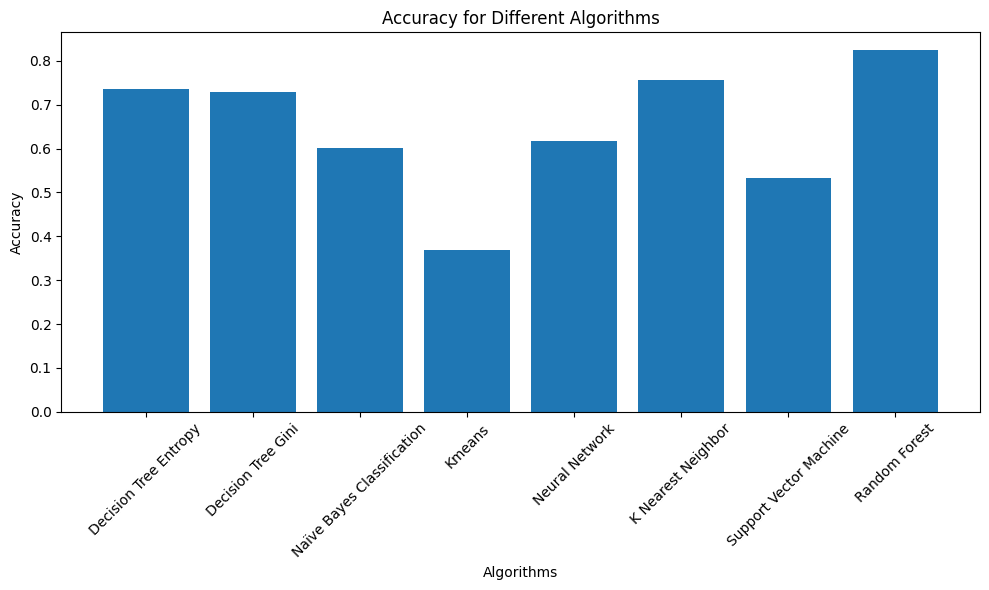

In [ ]:
import matplotlib.pyplot as plt

algorithms = ['Decision Tree Entropy', 'Decision Tree Gini', 'Naïve Bayes Classification', 'Kmeans', 'Neural Network', 'K Nearest Neighbor', 'Support Vector Machine', 'Random Forest']
accuracy = [0.7353333333333333, 0.7291, 0.6008333333333333, 0.3699, 0.6177333333333334, 0.7573, 0.5327, 0.8238]

plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracy)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Algorithms')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
